In [1]:
import xarray as xr

In [289]:
ds_full_file = xr.open_dataset('/proj/bolinc/users/x_sarbl/other_data/BS-FDBCK/UKESM/AEROCOMTRAJ/aerosol/aerocom3_UKESM_GlobalTraj-CE_conccnmodeAS_ModelLevel_201204_3hourly_u-cr294.nc')
                

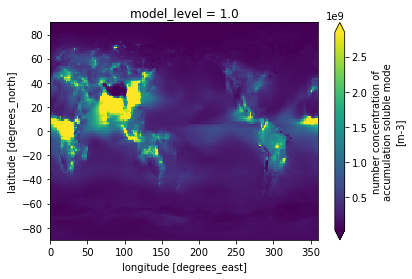

In [237]:
ds_full_file['nconcAS'].isel(model_level=0).mean('time').plot(robust=True)

In [238]:
ds_full_file['level_height']

<xarray.DataArray 'level_height' (model_level: 85)>
array([2.000000e+01, 5.333334e+01, 1.000000e+02, 1.600000e+02, 2.333333e+02,
       3.200000e+02, 4.200000e+02, 5.333334e+02, 6.599999e+02, 7.999999e+02,
       9.533337e+02, 1.120000e+03, 1.300000e+03, 1.493333e+03, 1.700000e+03,
       1.920000e+03, 2.153333e+03, 2.400000e+03, 2.659999e+03, 2.933333e+03,
       3.220000e+03, 3.520000e+03, 3.833333e+03, 4.160000e+03, 4.500000e+03,
       4.853333e+03, 5.220000e+03, 5.600000e+03, 5.993333e+03, 6.400000e+03,
       6.820000e+03, 7.253333e+03, 7.700000e+03, 8.160001e+03, 8.633340e+03,
       9.120007e+03, 9.620020e+03, 1.013337e+04, 1.066008e+04, 1.120016e+04,
       1.175364e+04, 1.232055e+04, 1.290093e+04, 1.349488e+04, 1.410248e+04,
       1.472388e+04, 1.535924e+04, 1.600882e+04, 1.667290e+04, 1.735190e+04,
       1.804629e+04, 1.875670e+04, 1.948389e+04, 2.022878e+04, 2.099253e+04,
       2.177651e+04, 2.258239e+04, 2.341216e+04, 2.426818e+04, 2.515322e+04,
       2.607059e+04, 2.702411e+04, 2.801826e+04, 2.905823e+04, 3.015002e+04,
       3.130054e+04, 3.251771e+04, 3.381059e+04, 3.518952e+04, 3.666624e+04,
       3.825403e+04, 3.996793e+04, 4.182485e+04, 4.384383e+04, 4.604621e+04,
       4.845583e+04, 5.109935e+04, 5.400643e+04, 5.721002e+04, 6.074670e+04,
       6.465696e+04, 6.898552e+04, 7.378177e+04, 7.910002e+04, 8.500000e+04],
      dtype=float32)
Coordinates:
  * model_level  (model_level) float32 1.0 2.0 3.0 4.0 ... 82.0 83.0 84.0 85.0
Attributes:
    long_name:  model level height
    units:      m
    positive:   up

In [239]:
from pathlib import Path
import matplotlib as mpl
import xarray as xr

In [240]:
from IPython import get_ipython

# noinspection PyBroadException
try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [241]:
from pathlib import Path

from bs_fdbck.util.BSOA_datamanip import ds2df_inc_preprocessing
from bs_fdbck.util.collocate.collocateLONLAToutput import CollocateLONLATout
from bs_fdbck.util.collocate.collocate_echam_salsa import CollocateModelEcham
import useful_scit.util.log as log

from bs_fdbck.util.plot.BSOA_plots import make_cool_grid, plot_scatter

import time
import xarray as xr
import matplotlib.pyplot as plt

In [242]:
import seaborn as sns
import matplotlib.pyplot as plt

In [243]:
import numpy as np

In [244]:
import numpy as np
from sklearn.linear_model import LinearRegression, BayesianRidge

In [245]:
from bs_fdbck.constants import path_measurement_data
import matplotlib.pyplot as plt

In [246]:
import pandas as pd
import numpy as np
import xarray as xr
xr.set_options(keep_attrs=True)

In [247]:
import datetime 

In [248]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Some definitions

In [249]:
R = 287.058
pressure = 1000. #hPa
kg2ug = 1e9
temperature = 273.15

In [250]:
model_lev_i=-1
select_station = 'SMR'

In [251]:
postproc_data = path_measurement_data /'model_station'/select_station
postproc_data.mkdir(parents=True, exist_ok=True)

In [252]:
models = ['UKESM']

di_mod2cases = dict()
#for mod in models:
#    di_mod2cases[mod]=dict()

#### Define dictionaries:

In [253]:
dic_mod_ca = dict()
dic_df_mod_case = dict()
dic_dfsm_mod_case = dict()

## Read in model data. 

### UKESM

In [267]:
case_name_ukesm = 'AEROCOMTRAJ'
case_name = case_name_ukesm
time_res = 'hour'
space_res = 'locations'
model_name = 'UKESM'

# %% [markdown]
# ## Settings:

# %%
from_t = '2012-01-01'
to_t = '2012-09-01'


In [268]:


case_mod = case_name#'OsloAero_intBVOC_f19_f19_mg17_fssp'
cases_ukesm = [case_name]
di_mod2cases[model_name]=cases_ukesm

#### Variables

In [269]:
varl = [
    'Mass_Conc_OM_NS',

    'Mass_Conc_OM_KS',
    'Mass_Conc_OM_KI',
    'Mass_Conc_OM_AS',
    'Mass_Conc_OM_CS',
    'mmrtr_OM_NS',
    'mmrtr_OM_KS',
    'mmrtr_OM_KI',
    'mmrtr_OM_AS',
    'mmrtr_OM_CS',
    'nconcNS',
    'nconcKS',
    'nconcKI',
    'nconcAS',
    'nconcCS',
    'ddryNS',
    'ddryKS',
    'ddryKI',
    'ddryAS',
    'ddryCS',
    'Temp',
]

#### Read in UKESM:

In [270]:
for case_name in cases_ukesm:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          # history_field=history_field
                          )
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

{'model_name': 'UKESM', 'history_field': '.h1.', 'use_pressure_coords': False}
got to check_if_load_raw_necessary
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_NS_AEROCOMTRAJ_2012-01-01_2012-09-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_KS_AEROCOMTRAJ_2012-01-01_2012-09-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_KI_AEROCOMTRAJ_2012-01-01_2012-09-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_AS_AEROCOMTRAJ_2012-01-01_2012-09-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_CS_AEROCOMTRAJ_2012-01-01_2012-09-01_hour_locations.nc exists
C

In [271]:
dic_ds = dict()
for ca in cases_ukesm:
    c = CollocateLONLATout(ca, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          )
                          # history_field=history_field)
        



    ds = c.get_collocated_dataset(varl)
    

    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    ds = ds.rename({'model_level':'lev'})
    dic_ds[ca]=ds.copy()

2023-02-21 18:15:30,112 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_NS_AEROCOMTRAJ_2012-01-01_2012-09-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_KS_AEROCOMTRAJ_2012-01-01_2012-09-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_KI_AEROCOMTRAJ_2012-01-01_2012-09-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_AS_AEROCOMTRAJ_2012-01-01_2012-09-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_CS_AEROCOMTRAJ_2012-01-01_2012-09-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/mmrtr_OM_NS_AEROCOMTRAJ_2012-01-01_2012-09-01_hour_locations.nc,

{'model_name': 'UKESM', 'history_field': '.h1.', 'use_pressure_coords': False}
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_NS_AEROCOMTRAJ_2012-01-01_2012-09-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_KS_AEROCOMTRAJ_2012-01-01_2012-09-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_KI_AEROCOMTRAJ_2012-01-01_2012-09-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_AS_AEROCOMTRAJ_2012-01-01_2012-09-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_CS_AEROCOMTRAJ_2012-01-01_2012-09-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/mmrtr_OM_NS_AEROCOMTRAJ_2012-01-01_2012-0

In [272]:
ca

'AEROCOMTRAJ'

In [273]:
dic_mod_ca[model_name] = dic_ds.copy()

In [266]:
dic_mod_ca[model_name]

{}

In [275]:
ds_sel_lev = dic_mod_ca[model_name][case_name].isel(lev = 0)

## Compare to full file: 


In [277]:
lat_smr = 61.85
lon_smr = 24.28
lat_atto = -2.150
lon_atto = 360-59.009

In [290]:
ds_smr = dic_mod_ca[model_name][case_name].sel(station='SMR')

In [298]:
ds_atto = dic_mod_ca[model_name][case_name].sel(station='ATTO')

In [300]:
ds_full_atto = ds_full_file.isel(model_level=0).sel(lat=lat_atto, lon = lon_atto, method='nearest')
ds_full_smr = ds_full_file.isel(model_level=0).sel(lat=lat_smr, lon = lon_smr, method='nearest')

In [295]:
ds_full_atto['nconcAS']

<xarray.DataArray 'nconcAS' (time: 240)>
array([7.129521e+08, 7.040988e+08, 8.185688e+08, ..., 6.952515e+08,
       7.257382e+08, 5.751469e+08], dtype=float32)
Coordinates:
  * time         (time) datetime64[ns] 2012-04-01 ... 2012-04-30T21:00:00
    lon          float32 300.9
    lat          float32 -1.875
    model_level  float32 1.0
Attributes:
    long_name:        number concentration of accumulation soluble mode
    units:            m-3
    um_stash_source:  m01s38i506
    frequency:        3hr

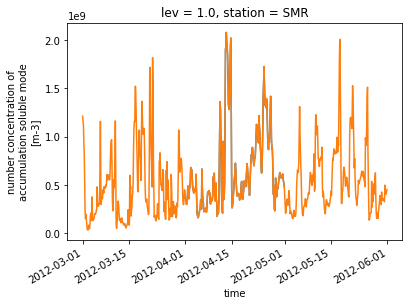

In [301]:
ds_full_smr['nconcAS'].plot()
ds_smr['nconcAS'].sel(time=slice('2012-03','2012-05')).isel(lev=0).plot()

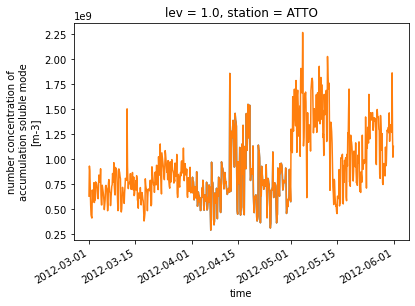

In [299]:
ds_full_atto['nconcAS'].plot()
ds_atto['nconcAS'].sel(time=slice('2012-03','2012-05')).isel(lev=0).plot()

In [ ]:
ds_atto['nn

In [276]:
ds_smr = dic_mod_ca[model_name][case_name].sel(station='SMR')

In [59]:
ds_smr

<xarray.Dataset>
Dimensions:          (time: 2192, lev: 85)
Coordinates:
  * time             (time) datetime64[ns] 2012-01-01 ... 2012-09-30T21:00:00
  * lev              (lev) float32 1.0 2.0 3.0 4.0 5.0 ... 82.0 83.0 84.0 85.0
    station          <U3 'SMR'
Data variables: (12/21)
    Mass_Conc_OM_AS  (time, lev) float32 dask.array<chunksize=(2192, 85), meta=np.ndarray>
    Mass_Conc_OM_CS  (time, lev) float32 dask.array<chunksize=(2192, 85), meta=np.ndarray>
    Mass_Conc_OM_KI  (time, lev) float32 dask.array<chunksize=(2192, 85), meta=np.ndarray>
    Mass_Conc_OM_KS  (time, lev) float32 dask.array<chunksize=(2192, 85), meta=np.ndarray>
    Mass_Conc_OM_NS  (time, lev) float32 dask.array<chunksize=(2192, 85), meta=np.ndarray>
    Temp             (time, lev) float32 dask.array<chunksize=(2192, 85), meta=np.ndarray>
    ...               ...
    mmrtr_OM_NS      (time, lev) float32 dask.array<chunksize=(2192, 85), meta=np.ndarray>
    nconcAS          (time, lev) float32 dask.array<chunksize=(2192, 85), meta=np.ndarray>
    nconcCS          (time, lev) float32 dask.array<chunksize=(2192, 85), meta=np.ndarray>
    nconcKI          (time, lev) float32 dask.array<chunksize=(2192, 85), meta=np.ndarray>
    nconcKS          (time, lev) float32 dask.array<chunksize=(2192, 85), meta=np.ndarray>
    nconcNS          (time, lev) float32 dask.array<chunksize=(2192, 85), meta=np.ndarray>

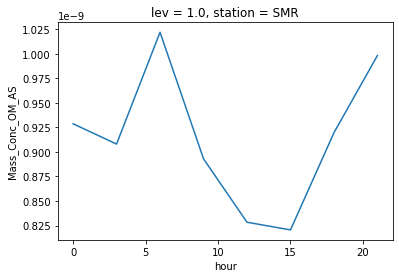

In [60]:
ds_smr.isel(lev=0)['Mass_Conc_OM_AS'].groupby(ds_smr['time.hour']).mean().plot()

## SELECT STATION:


In [61]:
for mod in dic_mod_ca.keys():
    print(mod)
    for ca in dic_mod_ca[mod].keys():
        dic_mod_ca[mod][ca] = dic_mod_ca[mod][ca].sel(station=select_station)
        dic_mod_ca[mod][ca].load()

UKESM


## Select level: 

In [62]:
for mod in dic_mod_ca.keys():
    if mod in ['EC-Earth', 'UKESM']:
        continue
    print(mod)
    for ca in dic_mod_ca[mod].keys():
        dic_mod_ca[mod][ca] = dic_mod_ca[mod][ca].isel(lev=model_lev_i)
        dic_mod_ca[mod][ca].load()

In [63]:
for mod in dic_mod_ca.keys():
    if mod not in ['EC-Earth', 'UKESM']:
        continue
    print(mod)
    lev_i_tm5 = -model_lev_i-1
    for ca in dic_mod_ca[mod].keys():
        dic_mod_ca[mod][ca] = dic_mod_ca[mod][ca].isel(lev=lev_i_tm5)
        dic_mod_ca[mod][ca].load()



UKESM


In [64]:
from bs_fdbck.util.BSOA_datamanip import calculate_daily_median_summer,calculate_summer_median, mask4summer,ds2df_echam

In [65]:
standard_air_density = 100*pressure/(R*temperature)

In [66]:
import datetime

### Adjust EC-Earth:

In [68]:
ds_ukesm = dic_mod_ca['UKESM'][case_name_ukesm]

## Check all data there: 

In [74]:
from bs_fdbck.util.BSOA_datamanip.ukesm import diam_vars, num_vars

nconcNS


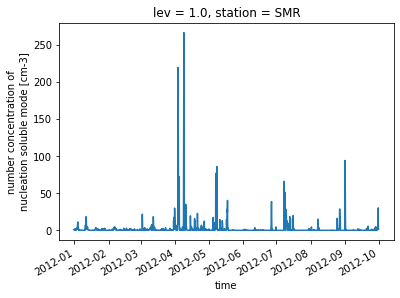

nconcKS


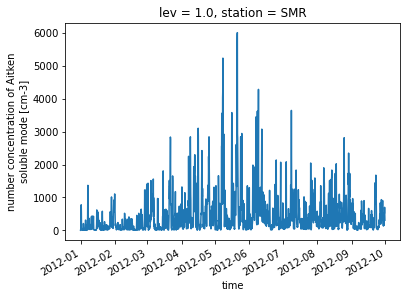

nconcKI


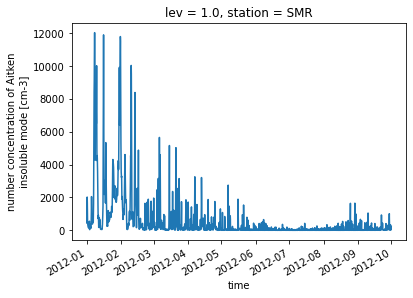

nconcAS


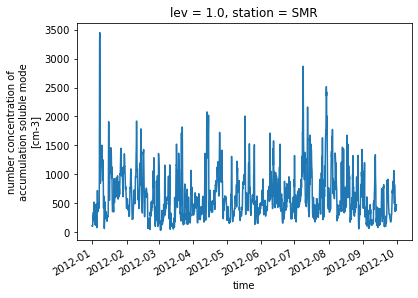

nconcCS


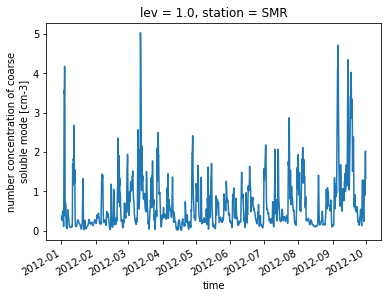

In [235]:
for n in num_vars:
    print(n)
    ds_ukesm[n].plot()
    plt.show()

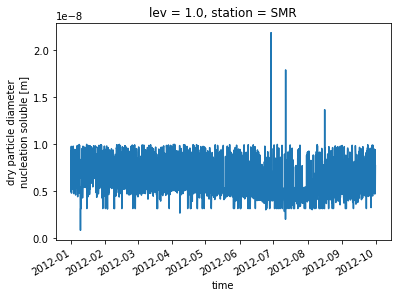

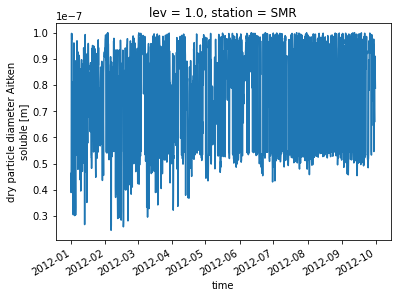

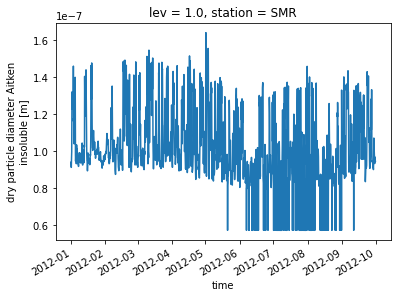

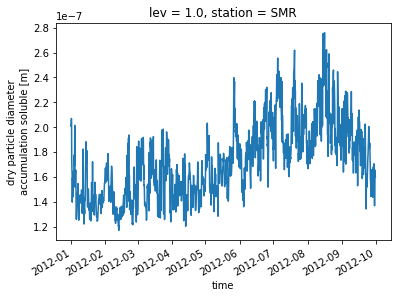

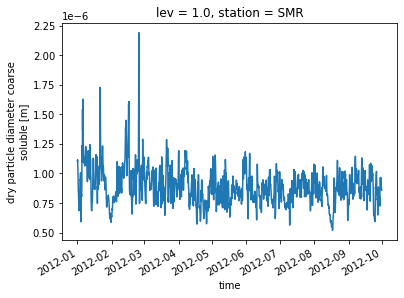

In [77]:
for n in diam_vars:
    ds_ukesm[n].plot()
    plt.show()

### Compare to sel from full file:


In [ ]:
conccnmodeAS

In [83]:
from bs_fdbck.util.BSOA_datamanip.ukesm import change_units_and_compute_vars_ukesm, modes_dic

In [80]:
ds_ukes_fix_units = change_units_and_compute_vars_ukesm(ds_ukesm,
                                                   # air_density=air_density,
                                                   # pressure = pressure,
                                                   # temperature=temperature

                                                   )

Converting nconcNS from m-3 to cm-3
Converting nconcKS from m-3 to cm-3
Converting nconcKI from m-3 to cm-3
Converting nconcAS from m-3 to cm-3
Converting nconcCS from m-3 to cm-3
Converting ddryNS from m to nm
Converting ddryKS from m to nm
Converting ddryKI from m to nm
Converting ddryAS from m to nm
Converting ddryCS from m to nm
Converting Mass_Conc_OM_NS from kg/m3 to ug/m3
Converting Mass_Conc_OM_KS from kg/m3 to ug/m3
Converting Mass_Conc_OM_KI from kg/m3 to ug/m3
Converting Mass_Conc_OM_AS from kg/m3 to ug/m3


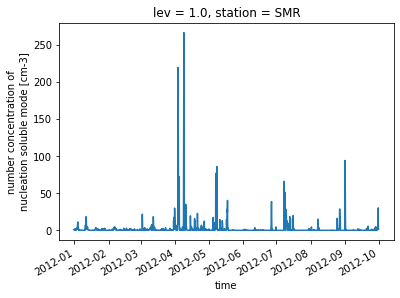

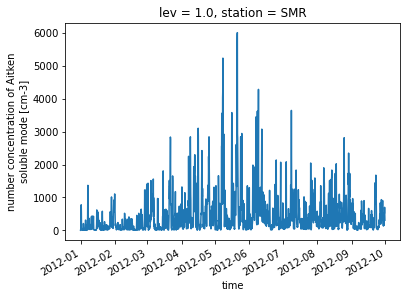

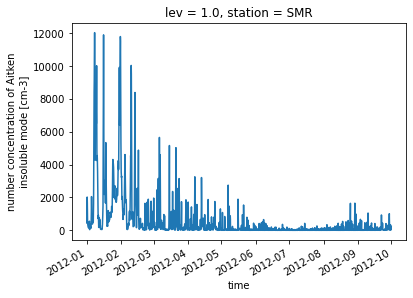

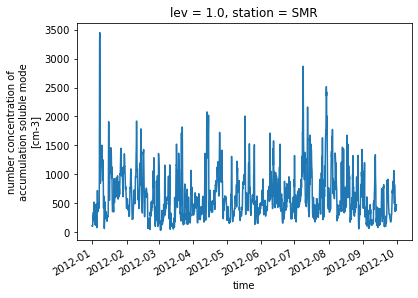

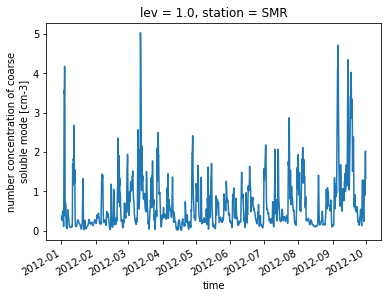

In [82]:
for n in num_vars:
    ds_ukes_fix_units[n].plot()
    plt.show()

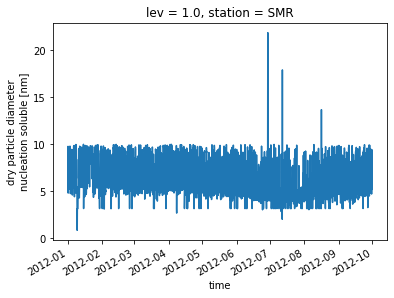

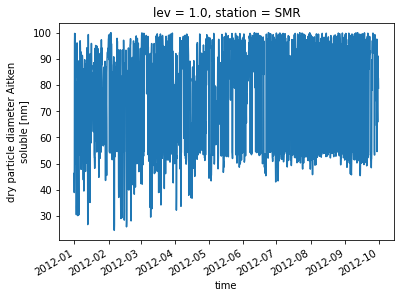

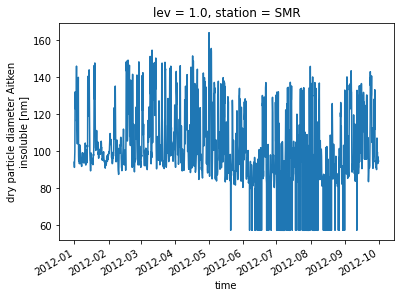

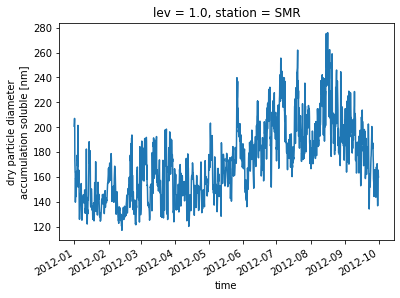

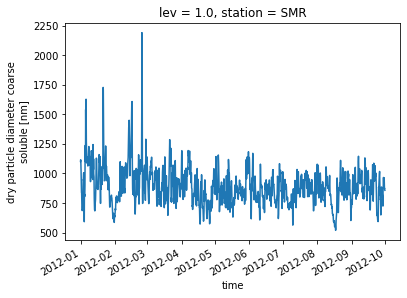

In [81]:
for n in diam_vars:
    ds_ukes_fix_units[n].plot()
    plt.show()

In [201]:
ds_sub = ds_ukes_fix_units

In [202]:
ds_ukesm['ddryNS']

<xarray.DataArray 'ddryNS' (time: 2192)>
array([9.277974 , 4.98329  , 9.781972 , ..., 9.429746 , 5.1947346,
       7.7232957], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2012-01-01 ... 2012-09-30T21:00:00
    lev      float32 1.0
    station  <U3 'SMR'
Attributes:
    long_name:        dry particle diameter nucleation soluble
    units:            nm
    um_stash_source:  m01s38i401
    frequency:        3hr

In [203]:
import numpy as np

In [213]:
diameters= xr.DataArray(np.logspace(0,4,50), dims='diameter')

In [214]:
ds_pnsd = ds_sub.drop(ds_sub.data_vars).copy()

ds_pnsd = ds_pnsd.assign_coords({'diameter':diameters})

/tmp/ipykernel_99133/2214921825.py:1: FutureWarning: dropping coordinates using `drop` is be deprecated; use drop_vars.
  ds_pnsd = ds_sub.drop(ds_sub.data_vars).copy()


In [215]:
for mo in modes_dic:
    _di = modes_dic[mo]
    vnum = _di['NUM']
    vdiam = _di['DIAM']
    sig = _di['SIG']
    print(sig)
    
    num = ds_sub[vnum]
    diam = ds_sub[vdiam]
    
    diameters = ds_pnsd['diameter']
    
    exponent = (np.log(diameters)-np.log(diam))**2/(2*np.log(sig)**2)
    
    first_term = num/(np.sqrt(2*np.pi)*np.log(sig))
    dNdlogD = first_term*np.exp(-exponent)
    ds_pnsd[f'dNdlogD_{mo}'] = dNdlogD

1.59
1.59
1.59
1.4
2.0


In [302]:
lat_smr

61.85

In [307]:
_ds = (ds_pnsd
       .sel(time=slice('2012-01-01','2012-01-01'))
       .mean('time')#*1e-6 #m-3 to cm-3
      )

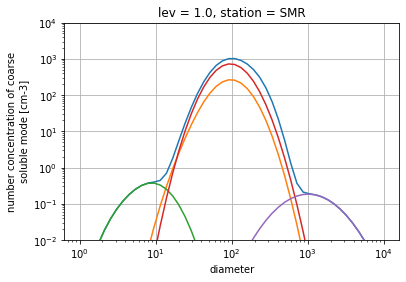

In [312]:
_ds.to_array(name='dNdlogD').sum('variable').plot(xscale='log', yscale='log')
_ds['dNdlogD_AIS'].plot(xscale='log', yscale='log')
_ds['dNdlogD_NUS'].plot(xscale='log', yscale='log')
_ds['dNdlogD_AII'].plot(xscale='log', yscale='log')
_ds['dNdlogD_COS'].plot(xscale='log', yscale='log')

plt.ylim([1e-2,1e4])
plt.grid()

(0.0, 1500.0)

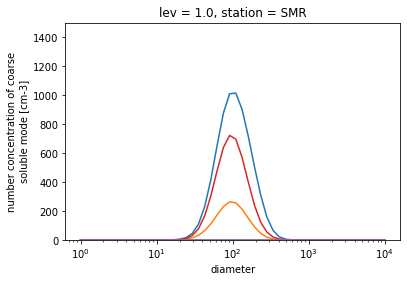

In [311]:
_ds.to_array(name='dNdlogD').sum('variable').plot(xscale='log', yscale='log')
_ds['dNdlogD_AIS'].plot(xscale='log', yscale='linear')
_ds['dNdlogD_NUS'].plot(xscale='log', yscale='linear')
_ds['dNdlogD_AII'].plot(xscale='log', yscale='linear')
_ds['dNdlogD_COS'].plot(xscale='log', yscale='linear')

plt.ylim([0,1.5e3])

1.5
1.5
1.5
1.5
1.5
1.5


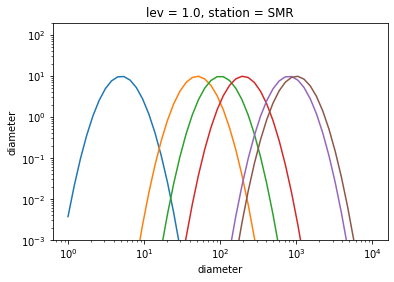

In [226]:
for diam in [5,50,100,200,800,1000]:
    sig = 1.5 
    print(sig)
    
    num = 10
    
    diameters = ds_pnsd['diameter']
    
    exponent = (np.log(diameters)-np.log(diam))**2/(2*np.log(sig)**2)
    
    first_term = num/(np.sqrt(2*np.pi)*np.log(sig))
    dNdlogD = first_term*np.exp(-exponent)
    dNdlogD.plot(xscale='log',yscale='log')
    plt.ylim([1e-3,2e2])

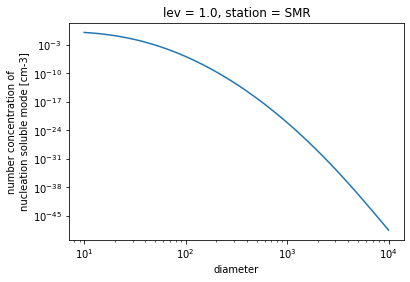

In [146]:
_ds['dNdlogD_NUS'].plot(xscale='log', yscale='log')

In [230]:
from bs_fdbck.util.BSOA_datamanip.ukesm import ds2df_ukesm

In [231]:

df, df_sm = ds2df_ukesm(ds_ukesm, 
                        take_daily_median=False, 
                        #air_density=air_dens,
                        model_lev_i =model_lev_i)
#df.index = df.reset_index()['time'].apply(fix_echam_time)
df

,lev,station,Mass_Conc_OM_AS,Mass_Conc_OM_CS,Mass_Conc_OM_KI,Mass_Conc_OM_KS,Mass_Conc_OM_NS,T,ddryAS,ddryCS,...,N50-500,N70-500,N100-500,N150-500,N200-500,OA,T_C,is_JJA,is_JA,isSummer
time,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,1.0,SMR,0.038777,2.058902e-13,0.223428,0.000251,3.923037e-07,270.635986,200.820175,1101.896606,...,522.190772,441.993851,308.623775,158.708194,78.237737,0.262457,-2.514008,False,False,False
2012-01-01 03:00:00,1.0,SMR,0.034976,1.888150e-13,0.398608,0.000245,2.555004e-08,270.515137,204.602295,1115.824219,...,889.586871,728.780847,472.729870,212.042709,95.829907,0.433829,-2.634857,False,False,False
2012-01-01 06:00:00,1.0,SMR,0.033645,1.851501e-13,0.921809,0.000788,7.284419e-07,270.327393,205.422104,1111.169067,...,1941.411778,1560.894235,961.126695,376.569217,148.961000,0.956243,-2.822601,False,False,False
2012-01-01 09:00:00,1.0,SMR,0.035996,2.864193e-13,0.883705,0.212927,1.084581e-08,270.039062,207.048813,1074.802002,...,2035.034376,1675.578935,1066.897663,430.419858,170.792719,1.132628,-3.110931,False,False,False
2012-01-01 12:00:00,1.0,SMR,0.053992,4.926639e-13,0.393360,0.425923,1.718327e-08,270.201904,203.992630,1020.493896,...,1432.554163,1205.530610,801.048217,348.863738,147.046521,0.873275,-2.948090,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-30 09:00:00,1.0,SMR,0.387603,8.075936e-12,0.011402,0.230805,2.680079e-07,283.109131,150.707718,915.680298,...,949.485412,846.017994,643.364349,314.445931,118.848332,0.629810,9.959137,False,False,False
2012-09-30 12:00:00,1.0,SMR,0.433970,1.147040e-11,0.008236,0.239235,6.479952e-07,283.282227,160.894531,871.473450,...,905.714828,799.259035,607.891721,316.532503,131.134119,0.681442,10.132233,False,False,False
2012-09-30 15:00:00,1.0,SMR,0.437408,1.247000e-11,0.019781,0.244110,1.696232e-05,283.320557,165.463394,874.648682,...,1018.461411,855.219558,610.545140,309.166148,130.738034,0.701316,10.170563,False,False,False


<AxesSubplot:xlabel='time'>

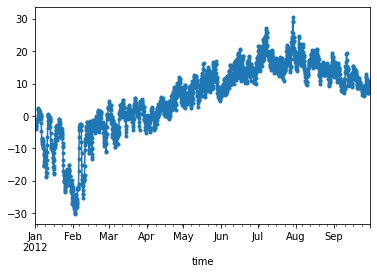

In [232]:
df['T_C'].plot(marker='.')#.columns#['Temperature'].plot()

<AxesSubplot:xlabel='time'>

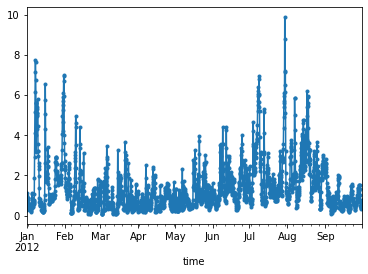

In [233]:
df['OA'].plot(marker='.')#.columns#['Temperature'].plot()

<AxesSubplot:xlabel='time'>

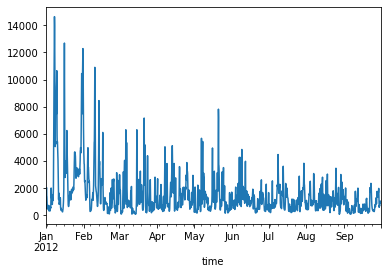

In [234]:
df['N50'].plot()#.columns#['Temperature'].plot()

## SHIFT TIME to local time: Easter european winter time EET UTC+2

In [74]:
import datetime

In [75]:
for mo in models:
    for ca in di_mod2cases[mo]:
        ind = dic_df_mod_case[mo][ca].index
        dic_df_mod_case[mo][ca].index = ind + datetime.timedelta(hours=2)

In [76]:
for mo in models:
    for ca in di_mod2cases[mo]:

        print(dic_df_mod_case[mo][ca].index[0:4])

DatetimeIndex(['2012-01-01 02:00:00', '2012-01-01 03:00:00',
               '2012-01-01 04:00:00', '2012-01-01 05:00:00'],
              dtype='datetime64[ns]', name='time', freq=None)
DatetimeIndex(['2012-01-02 02:00:00', '2012-01-02 03:00:00',
               '2012-01-02 04:00:00', '2012-01-02 05:00:00'],
              dtype='datetime64[ns]', name='time', freq=None)
DatetimeIndex(['2012-01-01 02:00:00', '2012-01-01 03:00:00',
               '2012-01-01 04:00:00', '2012-01-01 05:00:00'],
              dtype='datetime64[ns]', name='time', freq=None)


## Write to file:

In [77]:
for mod in models:
    print(mod)
    dic_df_mod_case[mod]
    for ca in dic_df_mod_case[mod].keys():
        print(mod, ca)
        fn_out = postproc_data/f'{select_station}_station_{mod}_{ca}.csv'
        if model_lev_i !=-1:
            fn_out = postproc_data/f'{select_station}_station_{mod}_{ca}_ilev{model_lev_i}.csv'
        else:
            fn_out = postproc_data/f'{select_station}_station_{mod}_{ca}.csv'
        print(fn_out)
        dic_df_mod_case[mod][ca].to_csv(fn_out)

ECHAM-SALSA
ECHAM-SALSA SALSA_BSOA_feedback
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/model_station/SMR/SMR_station_ECHAM-SALSA_SALSA_BSOA_feedback.csv
NorESM
NorESM OsloAero_intBVOC_f09_f09_mg17_fssp
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/model_station/SMR/SMR_station_NorESM_OsloAero_intBVOC_f09_f09_mg17_fssp.csv
EC-Earth
EC-Earth ECE3_output_Sara
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/model_station/SMR/SMR_station_EC-Earth_ECE3_output_Sara.csv


<AxesSubplot:xlabel='time'>

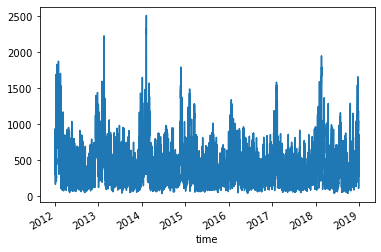

In [78]:
dic_df_mod_case[mod][ca]['N100'].plot()

In [201]:
ds_sub = ds_ukes_fix_units

In [202]:
ds_ukesm['ddryNS']

<xarray.DataArray 'ddryNS' (time: 2192)>
array([9.277974 , 4.98329  , 9.781972 , ..., 9.429746 , 5.1947346,
       7.7232957], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2012-01-01 ... 2012-09-30T21:00:00
    lev      float32 1.0
    station  <U3 'SMR'
Attributes:
    long_name:        dry particle diameter nucleation soluble
    units:            nm
    um_stash_source:  m01s38i401
    frequency:        3hr

In [203]:
import numpy as np

In [213]:
diameters= xr.DataArray(np.logspace(0,4,50), dims='diameter')

In [214]:
ds_pnsd = ds_sub.drop(ds_sub.data_vars).copy()

ds_pnsd = ds_pnsd.assign_coords({'diameter':diameters})

/tmp/ipykernel_99133/2214921825.py:1: FutureWarning: dropping coordinates using `drop` is be deprecated; use drop_vars.
  ds_pnsd = ds_sub.drop(ds_sub.data_vars).copy()


In [215]:
for mo in modes_dic:
    _di = modes_dic[mo]
    vnum = _di['NUM']
    vdiam = _di['DIAM']
    sig = _di['SIG']
    print(sig)
    
    num = ds_sub[vnum]
    diam = ds_sub[vdiam]
    
    diameters = ds_pnsd['diameter']
    
    exponent = (np.log(diameters)-np.log(diam))**2/(2*np.log(sig)**2)
    
    first_term = num/(np.sqrt(2*np.pi)*np.log(sig))
    dNdlogD = first_term*np.exp(-exponent)
    ds_pnsd[f'dNdlogD_{mo}'] = dNdlogD

1.59
1.59
1.59
1.4
2.0


In [216]:
_ds = ds_pnsd.mean('time')#*1e-6 #m-3 to cm-3

In [217]:
_ds = ds_pnsd.mean('time')#*1e-6 #m-3 to cm-3

(0.001, 1000.0)

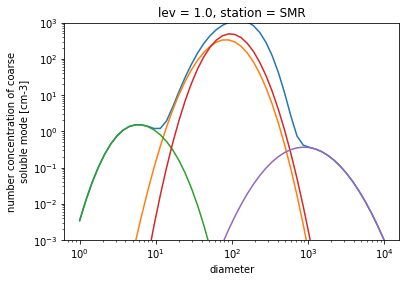

In [228]:
_ds.to_array(name='dNdlogD').sum('variable').plot(xscale='log', yscale='log')
_ds['dNdlogD_AIS'].plot(xscale='log', yscale='log')
_ds['dNdlogD_NUS'].plot(xscale='log', yscale='log')
_ds['dNdlogD_AII'].plot(xscale='log', yscale='log')
_ds['dNdlogD_COS'].plot(xscale='log', yscale='log')

plt.ylim([1e-3,1e3])

1.5
1.5
1.5
1.5
1.5
1.5


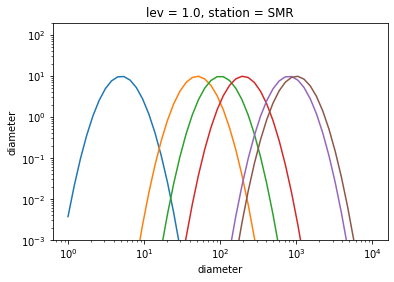

In [226]:
for diam in [5,50,100,200,800,1000]:
    sig = 1.5 
    print(sig)
    
    num = 10
    
    diameters = ds_pnsd['diameter']
    
    exponent = (np.log(diameters)-np.log(diam))**2/(2*np.log(sig)**2)
    
    first_term = num/(np.sqrt(2*np.pi)*np.log(sig))
    dNdlogD = first_term*np.exp(-exponent)
    dNdlogD.plot(xscale='log',yscale='log')
    plt.ylim([1e-3,2e2])

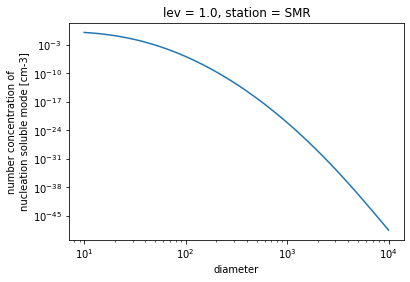

In [146]:
_ds['dNdlogD_NUS'].plot(xscale='log', yscale='log')